# Day 15 In-Class Assignment: Evaluating Models

### <p style="text-align: right;"> &#9989; Joseph Burke.</p>

#### <p style="text-align: right;"> &#9989; Group 10.</p>

<img src="https://cdn.britannica.com/17/83817-050-67C814CD/Mount-Everest.jpg" width=400>

In this assignment we're going to look at how we might evaluate the models we fit to data.

The **learning goals** of the assignment are to:

* Describe the utility of fitting trendlines to data, in the context of making predictions about the future
* Use best-fit lines to make predictions
* Quantitatively and qualitatively describe how to determine the goodness of fit for a given line

### Assignment instructions

Work with your group to complete this assignment. Instructions for submitting this assignment are at the end of the notebook. The assignment is due at the end of class.

---
## 1. Coming to a Consensus on Goodness of Fit

&#9989;&nbsp; In the pre-class assignment, you were tasked with coming up with an algorithm for determining the goodness of fit (Part 2.2). Discuss with your group the different algorithms that you each came up with. What are the differences between each of your algorithms? What are the benefits of each algorithm? What are the drawbacks?

**As a group,** reach a consensus on a good algorithm for determining the goodness of fit. Write your group’s algorithm in the cell below. When thinking about how to design your algorithm it can be useful to explore the concept of a "**residual**" when fitting a line to data. Basically, a residual is a measurement of how far a data point is from the expected value generated by our line (or curve) of best fit. You can see a visual representation of this here: https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/regression-library/a/introduction-to-residuals

<font size=+3>&#9998;</font> *y = mx+b is good for straight lines for a line of best fit, other models may model curve better.  Risidual is the difference between actual values and predicted values, the smaller they are the more accurate the model/best fit is. To calculate residual, SUM(ABS(f(x)-y))


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit


## **BEFORE MOVING ON CHECK WITH AN INSTRUCTOR**

---
## 2. Modeling the Air Atop Everest

The higher you are above sea level, the thinner the air gets. For instance, in Denver (elevation: 1 mile, or 1600 meters), air density is about 12% lower than it is in East Lansing. For every eight breaths you take in Michigan, you’ll need nine breaths in Denver to get the equivalent amount of air.

This difference in air density with altitude can be lethal for mountain climbers, where the density of air can be a third or less the value at sea level. Meaning that for every one breath you take in Michigan, you’d need to take *three* breaths on top of Mount Everest to get the equivalent amount of air.

You are working for a company that specializes in selling air tanks to climbers. You’ve been tasked with writing a piece of code that can determine the density of air for a given altitude so that your company can calculate how many air tanks a climber will need. 

You don’t have much of a physics or chemistry background, so you’re not sure how to make a physical model for this situation. But you do have data from a previous expedition, where the climbers took measurements of the density at different heights. 

####  &#9989;&nbsp; **2.1** Use the data provided to test out different models. Decide on one model that you feel best fits the data. 

The three models you should test out are:

### Linear Model
$$y = Ax + B$$

### Quadratic Model
$$y = Ax^2 + Bx + C$$

### Exponential Model
$$y = A\exp(-Bx) + C$$


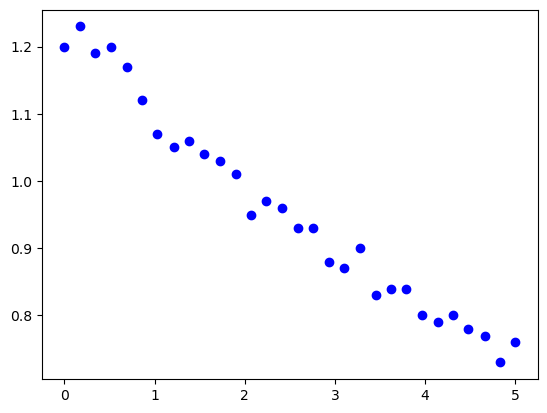

In [6]:
#Data to use for your model
#Height is in kilometers, density is in kg/m^3
import numpy as np
height = np.array([0.0,0.17,0.34,0.52,0.69,0.86,1.03,1.21,1.38,1.55,1.72,1.9,2.07,2.24,2.41,2.59,2.76,2.93,3.1,3.28,3.45,3.62,3.79,3.97,4.14,4.31,4.48,4.66,4.83,5.0])
density = np.array([1.2,1.23,1.19,1.2,1.17,1.12,1.07,1.05,1.06,1.04,1.03,1.01,0.95,0.97,0.96,0.93,0.93,0.88,0.87,0.9,0.83,0.84,0.84,0.8,0.79,0.8,0.78,0.77,0.73,0.76])


plt.scatter(height,density,color=['blue'])
plt.xlabel='height'
plt.ylabel='density'

In [14]:
# Write your code here
def linear(x,a=1,b=0):
    val = []
    for i in range(len(x)):
        val.append(a*x[i]+b)
    return val

values = linear(height,1,1.2)   

[ 0.0083611  -0.13984237  1.2353752 ]


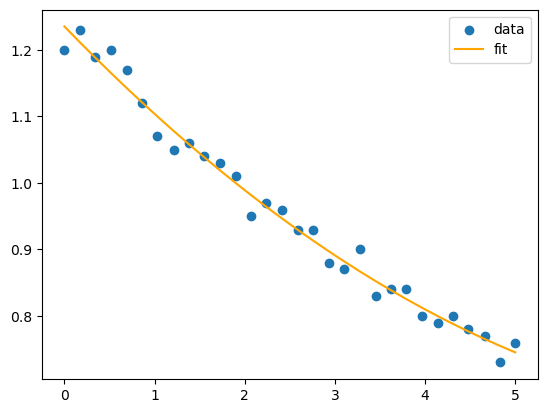

In [18]:
def quad_function(x, A, B,C):
    return (A * x**2 + B*x + C)

from scipy.optimize import curve_fit

best_fit_parameters, just_ignore_this_for_now = curve_fit(quad_function, height, density)
print(best_fit_parameters)

A_expected = best_fit_parameters[0]  
B_expected = best_fit_parameters[1]
C_expected = best_fit_parameters[2]

y_expected = quad_function(height, A_expected, B_expected, C_expected)

plt.scatter(height, density, label = "data")
plt.plot(height, y_expected, color = "orange", label = "fit")
plt.legend()

[-0.09803687  1.20175884]


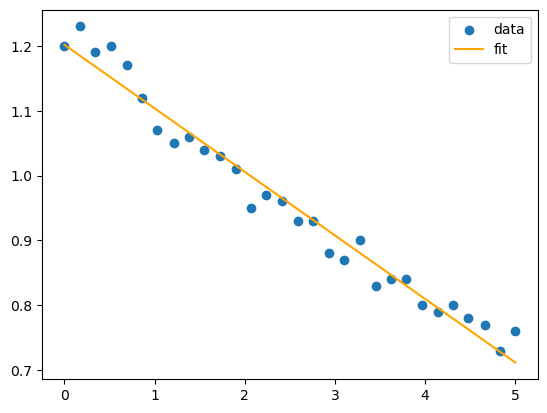

In [16]:
def lin_function(x, A, B):
    return (A * x + B)

from scipy.optimize import curve_fit

best_fit_parameters, just_ignore_this_for_now = curve_fit(lin_function, height, density)
print(best_fit_parameters)

A_expected = best_fit_parameters[0]  
B_expected = best_fit_parameters[1]

y_expected = lin_function(height, A_expected, B_expected)

plt.scatter(height, density, label = "data")
plt.plot(height, y_expected, color = "orange", label = "fit")
plt.legend()

[0.86951266 0.16868523 0.36807099]


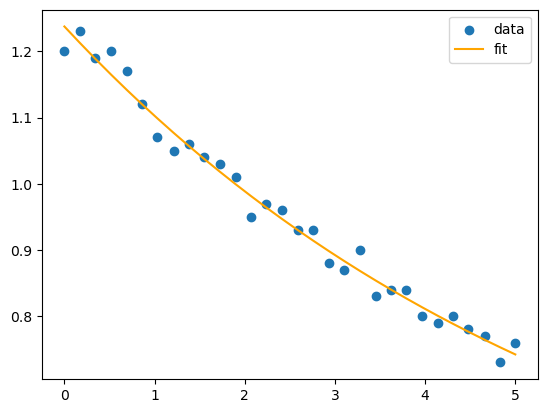

In [19]:
def exp_function(x, A, B,C):
    return (A * np.exp(-B*x) + C)
#𝑦=𝐴exp(−𝐵𝑥)+𝐶
from scipy.optimize import curve_fit

best_fit_parameters, just_ignore_this_for_now = curve_fit(exp_function, height, density)
print(best_fit_parameters)

A_expected = best_fit_parameters[0]  
B_expected = best_fit_parameters[1]
C_expected = best_fit_parameters[2]

y_expected = exp_function(height, A_expected, B_expected, C_expected)

plt.scatter(height, density, label = "data")
plt.plot(height, y_expected, color = "orange", label = "fit")
plt.legend()

####  &#9989;&nbsp; **2.2** Code up the algorithm you defined in part 1 and *quantitatively* compare how well each model fits the data.

In [40]:
# Write your code for calculating goodness of fit here
quad = [ 0.0083611 , -0.13984237 , 1.2353752 ]
#A*x**2 + B*x + C
lin = [-0.09803687,  1.20175884]
#A*x + B
exp = [0.86951266 ,0.16868523, 0.36807099]
#A * exp(-B * x) +C

def residuals(x, y, kind):
    yval=[] 
    resid = []
    
    if kind == 'lin':
        A = lin[0]
        B = lin[1]
        for i in x:
            yval.append(lin_function(i, A, B))
    elif kind == 'quad':
        A = quad[0]
        B = quad[1]
        C = quad[2]
        for i in x:
            yval.append(quad_function(i,A,B,C))
    elif kind == 'exp':
        A = exp[0]
        B = exp[1]
        C = exp[2]
        for i in x:
            yval.append(exp_function(i,A,B,C))
    else:
        yval='Not function option'
    for i in range(len(x)):
        resid.append(abs(yval[i]-y[i]))
    res = sum(resid)
    return res

linres = residuals(height, density, 'lin')
print('linear residual',linres)

quadres = residuals(height, density, 'quad')
print('quadratic residual',quadres)

expres = residuals(height, density, 'exp')
print('exponential residual',expres)
        

linear residual 0.5944960482000009
quadratic residual 0.45157073595999975
exponential residual 0.45591621318518827


####  &#9989;&nbsp; **2.3** Which model best fits the data? Is it substantially better than the other models?

*The quadratic model best fits the data because it has the smallest residual.*

####  &#9989;&nbsp; **2.4** Mount Everest is 8.85 kilometers high. What does each model predict for the density of air on top of Mount Everest?

<font size=+3>&#9998;</font> *.6526 kg/m^3. quad,  .3341 linear,  .5635 exponential.*


In [43]:
quad = [0.0083611 , -0.13984237 , 1.2353752 ]
lin = [-0.09803687,  1.20175884]
exp = [0.86951266 ,0.16868523, 0.36807099]

A = quad[0]
B = quad[1]
C = quad[2]
print(quad_function(8.85, A, B,C))

A = lin[0]
B = lin[1]
print(lin_function(8.85, A, B))

A = exp[0]
B = exp[1]
C = exp[2]
print(exp_function(8.85, A, B,C))

0.65263248025
0.3341325405000002
0.5634748723770121


####  &#9989;&nbsp; **2.5** What do you believe the density of of air is at the top of Mount Everest? Justify your answer using the results from the previous questions.

<font size=+3>&#9998;</font> *I think it might be more than .65, as the cold temperatures make the air more dense.  I believe it would stay true to the quadratic function and flatten out like that.*


---
## To wrap up, check in with your instructor 

Before calling your instructor over, **as a group come up with an explanation for what model your group has chosen and why you've chosen it.** You should to be able to justify your reasoning using a calculation or a figure of some sort.

Once your whole group is ready, call over an instructor and present your results to them.

---
## Assignment wrapup

Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!** 

In [44]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-ic-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

&#169; Copyright 2023,  [Department of Computational Mathematics, Science and Engineering](https://cmse.msu.edu) at Michigan State University.